In [58]:
%load_ext autoreload
%autoreload 2

import sympy as sp
import numpy as np
from sympy import Derivative, Symbol, IndexedBase, Idx, Sum, Function, Matrix, Add, Eq
from sympy import diff, symbols, solve, linsolve, simplify, poly, pprint, factor, integrate, lambdify
from sympy import cos, sin, pi

# syspath trick
import sys
sys.path.append('../')

from tatarinov.database.singleton import db
db.set_root('../data/triangular_platform')


from tatarinov.utils.jupyter import display_list, display_obj, display_from_what, display_list_from_what
from tatarinov.core.variables import _omega, _v
from tatarinov.core.tatarinov import TatarinovSystem
from tatarinov.core.numerical import Integrator

from tatarinov.problems.triangular_platform.variables import *
from tatarinov.problems.triangular_platform.structure import *
from tatarinov.problems.triangular_platform.functions import euler, scalar
from tatarinov.utils.sympy import MatrixElDerivative

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
db.get_all_names()

['left_TWnu3_Matrix',
 'right_TWnu3_Matrix',
 'good_params',
 'wheel_in0',
 'nu1,nu2',
 'J_platform',
 'constraints',
 'L',
 'nu1,nu2(x,y)',
 'J_wheel',
 'L_platform',
 'Q_dw_by_dv',
 'TWNU3',
 'L_wheel',
 'Det',
 'eqs+TW']

In [60]:
TWNU3 = db.load('TWNU3').obj
constraints = db.load('constraints').obj
nu1, nu2 = db.load('nu1,nu2(x,y)').obj
good_params = db.load('good_params').obj

Loading from: ../data/triangular_platform/TWNU3.pickle
Loading from: ../data/triangular_platform/constraints.pickle
Loading from: ../data/triangular_platform/nu1,nu2(x,y).pickle
Loading from: ../data/triangular_platform/good_params.pickle


#### Зададим левую и правую часть

In [61]:
_eqs = [
    TWNU3[2].subs(good_params).args[1],
    constraints[2].subs(good_params).args[1],
    constraints[4].subs(good_params).args[1]
]

In [62]:
# display_list(_eqs)

In [63]:
_vars = [
    nu[3],
    alpha,
    theta[0],
    t
]

In [64]:
# display_list(_vars)

#### Подставим уравнения (правую часть) и переменные (левую часть + время) в конструктор

In [65]:
itg = Integrator(_vars, _eqs)

In [68]:
itg.set_subs_dict(subs_dict={
    x: t**2/2,
    y: 0,
    nu[1]: nu1.args[1],
    nu[2]: nu2.args[1],
}, ext_subs_dict={
    Derivative(alpha, t): nu[3] # Это потому что после подстановки в nu'(..., alpha) вылезает alpha' (=nu3)
})

#### Введем дополнительные соотношения, зависящие от полученных значение ($T, W$) 

In [69]:
itg.set_additional_eqs({
    T[1]: TWNU3[0].args[1],
    W[1]: TWNU3[1].args[1]
})

In [72]:
# integr.eqs[1].subs(integr.subs_dict).doit()

In [73]:
# integr.eqs[2].subs(integr.subs_dict).doit()

In [74]:
# integr.lambdify_eqs()

In [75]:
# integr.lambdify_eqs()([0,0,0], 0)

In [79]:
%%time

_f0 = [0,0,0]
_time = np.linspace(0., 20, 200)

itg.integrate(_f0, _time)

CPU times: user 1min, sys: 5.87 ms, total: 1min
Wall time: 1min


####  Нарисуем

Variable: alpha(t)


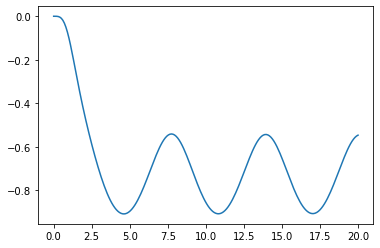

Variable: theta0(t)


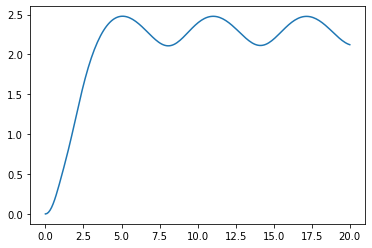

Variable: nu3(t)


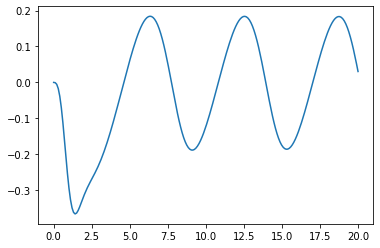

In [80]:
itg.plot_eq([alpha, theta[0], nu[3]])

Variable: W1(t)


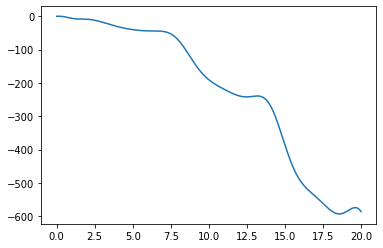

Variable: T1(t)


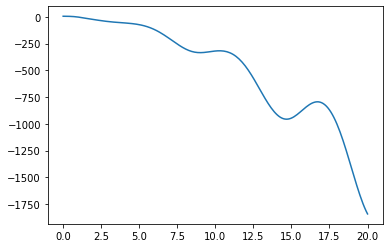

In [81]:
itg.plot_add_eq([W[1], T[1]])